In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [47]:
df = pd.read_csv("data/winequality-white.csv",sep=";")

In [48]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
df.shape

(4898, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [51]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [52]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [53]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [54]:
# Preprocessing Data 
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

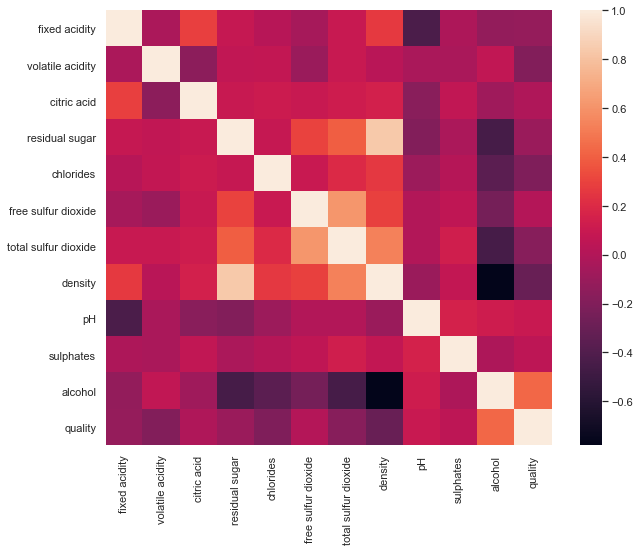

In [55]:
sns.set(rc={'figure.figsize':(10,8)})
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

/home/zalman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


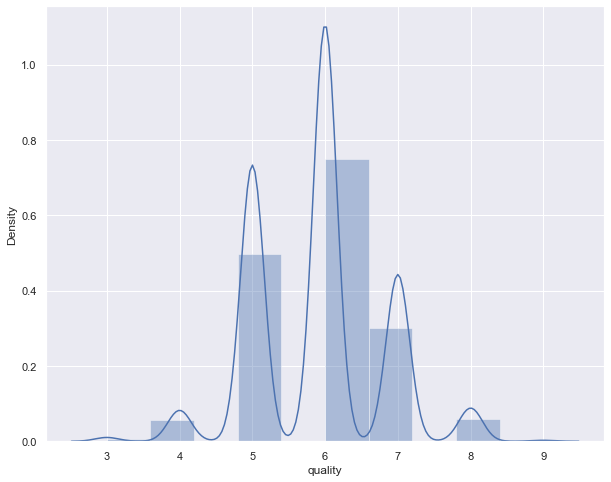

In [56]:
sns.set()
sns.distplot(df["quality"],bins=10)
plt.show()

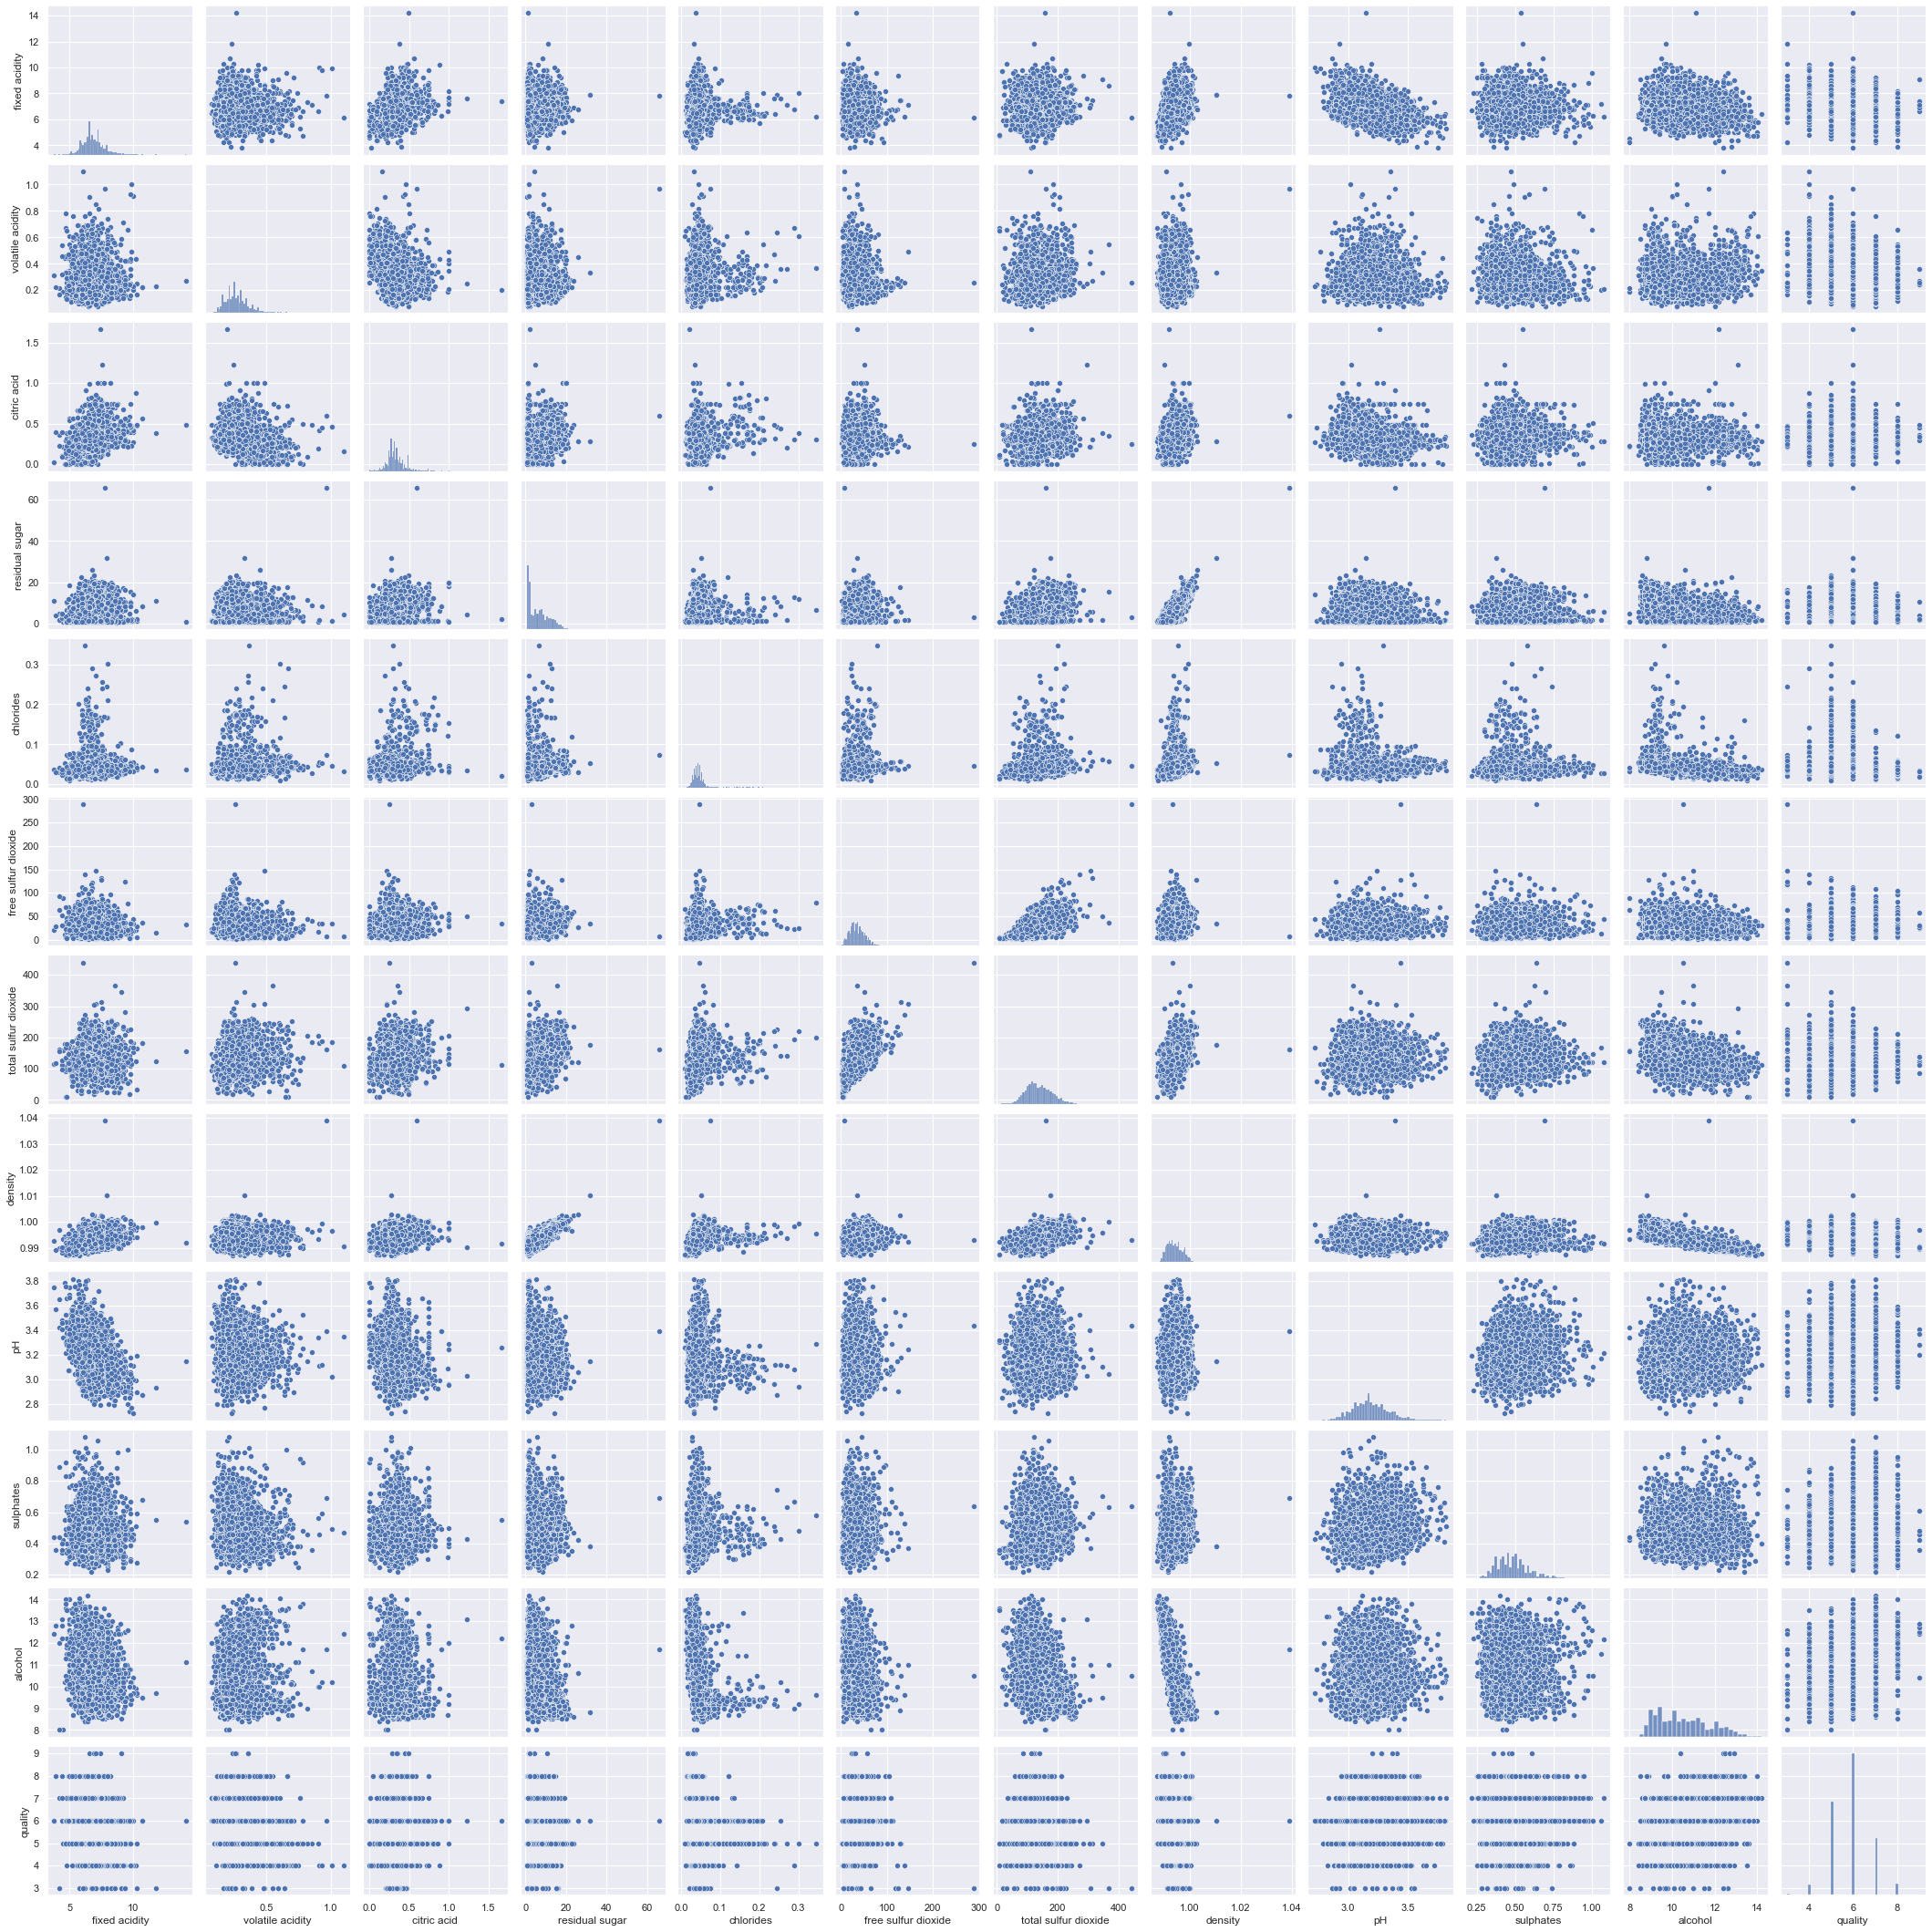

In [57]:
sns.set()
sns.pairplot(df)
plt.show()

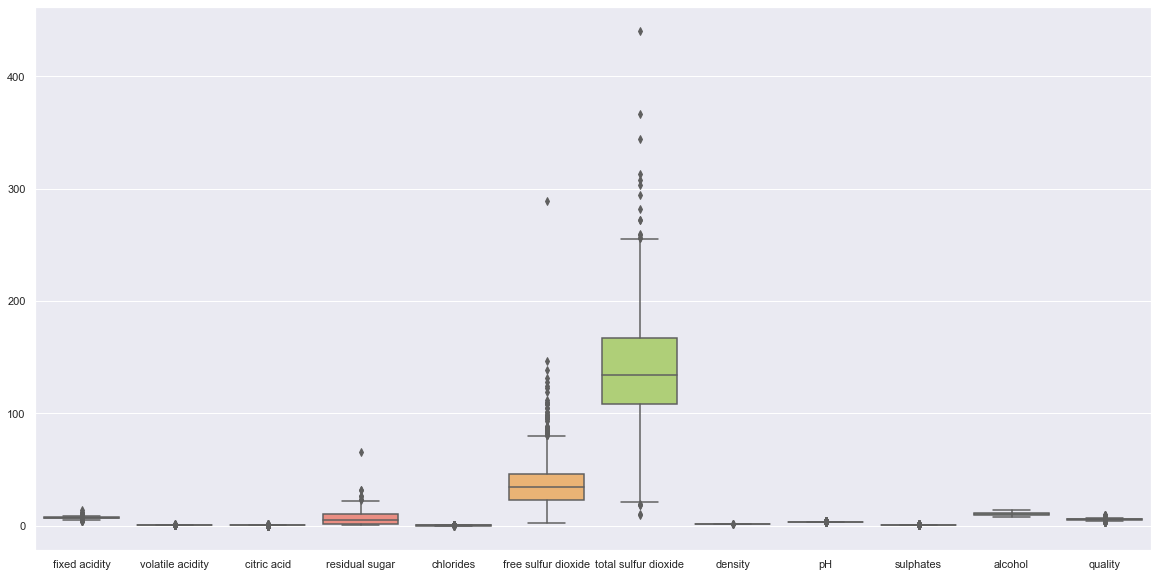

In [58]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette="Set3")
plt.show()

In [ ]:
# Checking outliers

In [59]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()

In [60]:
print(lower_limit,upper_limit)

-15.713327043072141 86.32949690832326


In [62]:
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]
df.shape[0] - df2.shape[0]

32

In [63]:
lower_limit = df2['total sulfur dioxide'].mean() - 3*df2['total sulfur dioxide'].std()
upper_limit = df2['total sulfur dioxide'].mean() + 3*df2['total sulfur dioxide'].std()
print(lower_limit,upper_limit)

11.876214320824289 263.95424190605615


In [64]:
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [65]:
df2.shape[0] - df3.shape[0]

8

In [66]:
lower_limit = df3['residual sugar'].mean() - 3*df3['residual sugar'].std()
upper_limit = df3['residual sugar'].mean() + 3*df3['residual sugar'].std()
print(lower_limit,upper_limit)

-8.82999698417223 21.616864007638707


In [67]:
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [68]:
df3.shape[0] - df4.shape[0]

9

In [7]:
bins = (3, 6.5, 9)
group_names = ["bad", "good"]
df["quality"] = pd.cut(df["quality"], bins = bins, labels = group_names)

In [8]:
label_quality = LabelEncoder()

In [9]:
df["quality"] = label_quality.fit_transform(df["quality"])

In [10]:
df["quality"].value_counts() #problem with 2

0    3818
1    1060
2      20
Name: quality, dtype: int64

/home/zalman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

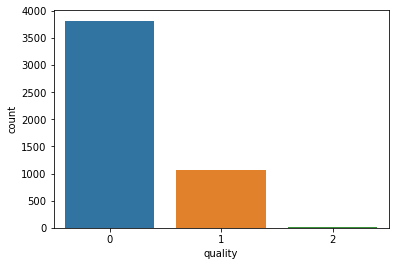

In [11]:
sns.countplot(df["quality"])

In [12]:
df = df[df.quality != 2]

<AxesSubplot:xlabel='quality', ylabel='count'>

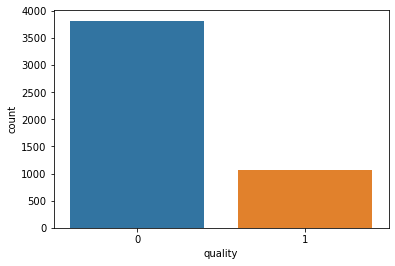

In [13]:
sns.countplot(x = df["quality"])

In [14]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [15]:
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Applying Standard scaling to get it optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Linear Model

In [44]:
from sklearn.linear_model import LinearRegression
lmf= LinearRegression().fit(X_train,y_train)
lmf.score(X_train,y_train)

0.18734023407637523

# Random Forest Classifier 

In [17]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
# model performance
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       789
           1       0.80      0.59      0.68       187

    accuracy                           0.89       976
   macro avg       0.85      0.78      0.81       976
weighted avg       0.89      0.89      0.89       976

[[761  28]
 [ 76 111]]


# SVM Classifier

In [19]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [20]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       789
           1       0.66      0.33      0.44       187

    accuracy                           0.84       976
   macro avg       0.76      0.64      0.67       976
weighted avg       0.82      0.84      0.82       976

[[758  31]
 [126  61]]


# Neural Network

In [21]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [22]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       789
           1       0.56      0.51      0.54       187

    accuracy                           0.83       976
   macro avg       0.73      0.71      0.72       976
weighted avg       0.83      0.83      0.83       976

[[715  74]
 [ 91  96]]


In [23]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.8934426229508197

# Decision Trees

In [24]:
from sklearn import tree

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knc = KNeighborsClassifier()
knc.fit(X, y)
knc.score(X, y)

0.8569085690856909

# Boosting

In [31]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [32]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8217213114754098